# Testing NeuroM API for morphology
# To download neuron files : https://neuroinformatics.nl/HBP/morphology-viewer/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import neurom as nm
from neurom import viewer
from tqdm import tqdm

In [2]:
morpho_path = '../morphologies/Scnn1a-Tg2-Cre.swc'
neuron = nm.load_neuron(morpho_path)

# Visualisation

## Single dendritic tree

Visualizing...: 100%|██████████| 4281/4281 [00:04<00:00, 932.62it/s]


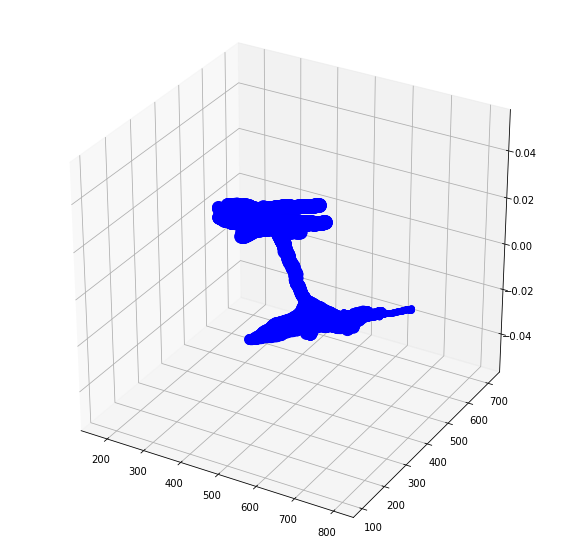

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
for pts in tqdm(neuron.neurites[0].points, 'Visualizing...') :
    plt.scatter(pts[0], pts[1], pts[2], c = 'b')

## Whole neuron

Visualizing...: 100%|██████████| 5179/5179 [00:05<00:00, 901.87it/s]


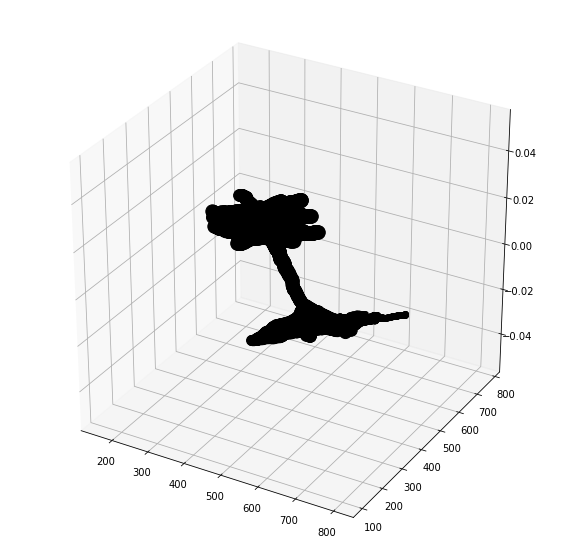

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
for pts in tqdm(neuron.points, 'Visualizing...') :
    plt.scatter(pts[0], pts[1], pts[2], c = 'k')

# Counting the volume in a voxel
Given a voxel resolution R, the neuron simply belongs to the cluster coordinates * R, floored to the integer value

In [7]:
resolution = .01 #points
example_voxel = np.int16(np.array([278, 627 , 184]) * resolution)
example_voxel

array([2, 6, 1], dtype=int16)

Visualizing...: 100%|██████████| 5179/5179 [00:05<00:00, 957.45it/s] 


857 neurons in the voxel


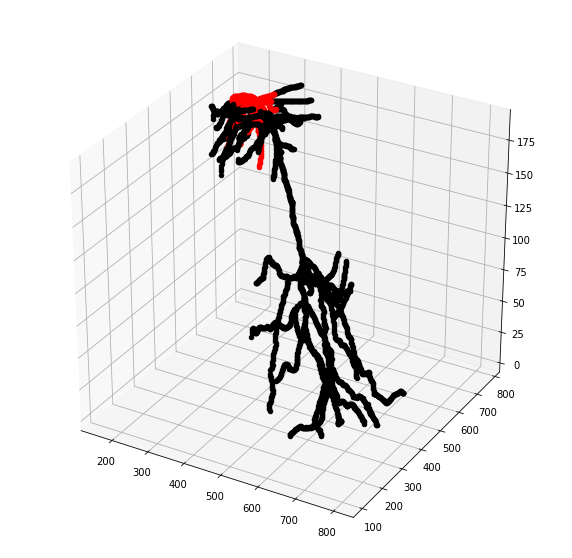

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

ins = 0
for pts in tqdm(neuron.points, 'Visualizing...') :
    #print(np.int16(pts[:3]))
    
    if (np.int16(pts[:3] * resolution) == example_voxel).all() : 
        ax.scatter(pts[0], pts[1], pts[2], c = 'r')
        ins +=1 
    else : 
        ax.scatter(pts[0], pts[1], pts[2], c = 'k')


print('%d neurons in the voxel' % ins)
plt.show()